In [41]:
from plotnine import *
import pandas as pd
import numpy as np

In [42]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
time = "2024-03-14_20:08"



# time = "2024-03-14_15:32"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")


# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["future_candles"] != 5]
# df = df[df["n_clusters"] != 150]
# df = df[df["n_clusters"] != 200]
# df = df[df["log_return_threshold"] <= 0.01]
# df = df[df["calmar_ratio_threshold"] == 2]

df

,window,train_sum_annualized_return,val_sum_annualized_return,val_sum_max_drawdown,val_avg_calmar_ratio,test_sum_annualized_return,test_sum_max_drawdown,test_avg_calmar_ratio,train_cumsum_annualized_return,val_cumsum_annualized_return,test_cumsum_annualized_return,train_size,test_size,random_state
0,0,2.092346,0.036539,0.013011,2.808394,-0.004450,0.018322,-0.242901,2.092346,0.036539,-0.004450,14400,1920,32
1,1,2.104055,0.078371,0.034374,2.252235,0.020295,0.050635,0.806092,4.196401,0.114910,0.015845,14400,1920,32
2,2,2.450463,0.107049,0.029820,3.772422,-0.030590,0.070890,0.288777,6.646864,0.221959,-0.014745,14400,1920,32
3,3,1.264034,0.030564,0.011277,2.710231,0.040701,0.010345,3.934445,7.910898,0.252523,0.025956,14400,1920,32
4,4,1.595698,0.039646,0.011359,9.015903,0.004789,0.014800,0.746498,9.506596,0.292170,0.030744,14400,1920,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,46,3.245381,0.324322,0.054499,9.353394,0.140275,0.174222,4.134548,198.651945,11.373480,0.690239,14400,1920,13
5050,47,4.084087,0.083343,0.013628,6.763180,-0.029703,0.072274,0.150123,202.736031,11.456823,0.660536,14400,1920,13
5051,48,2.924978,0.115265,0.046369,2.669903,0.025079,0.057898,0.918891,205.661010,11.572088,0.685615,14400,1920,13
5052,49,1.883416,0.192047,0.041244,6.416607,-0.104711,0.249141,-0.003135,207.544426,11.764135,0.580904,14400,1920,13


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


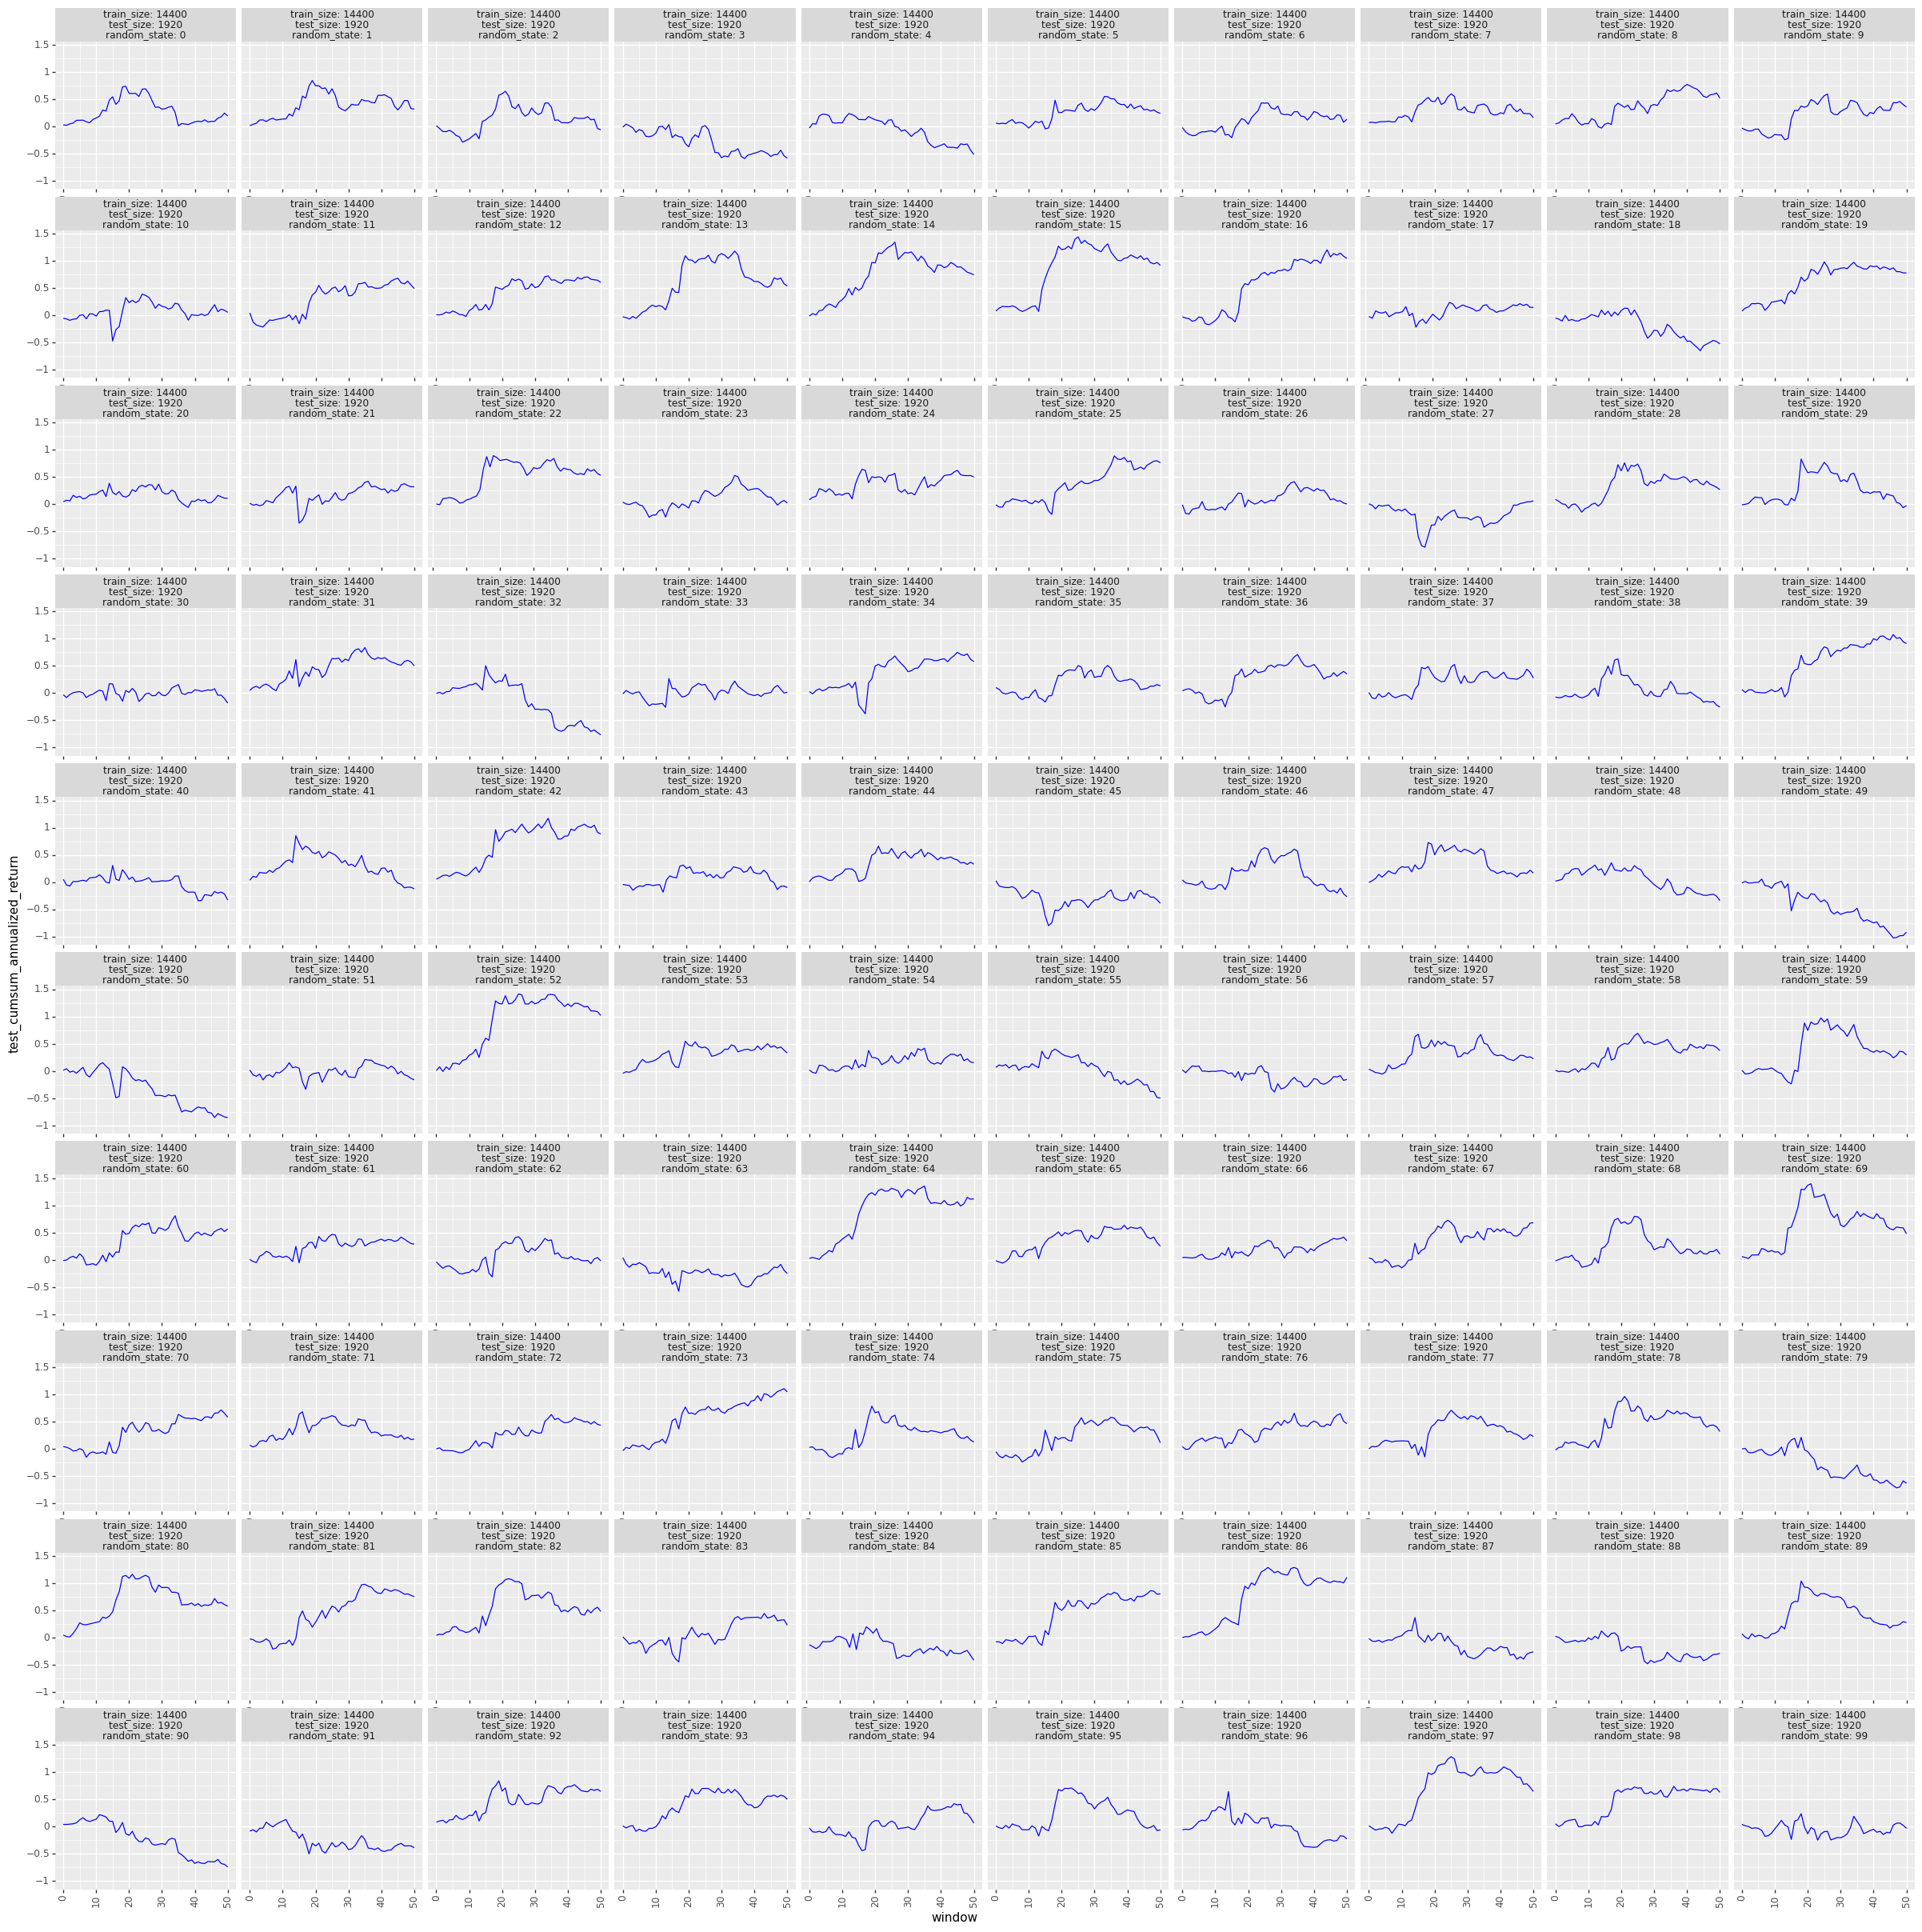

In [43]:
p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


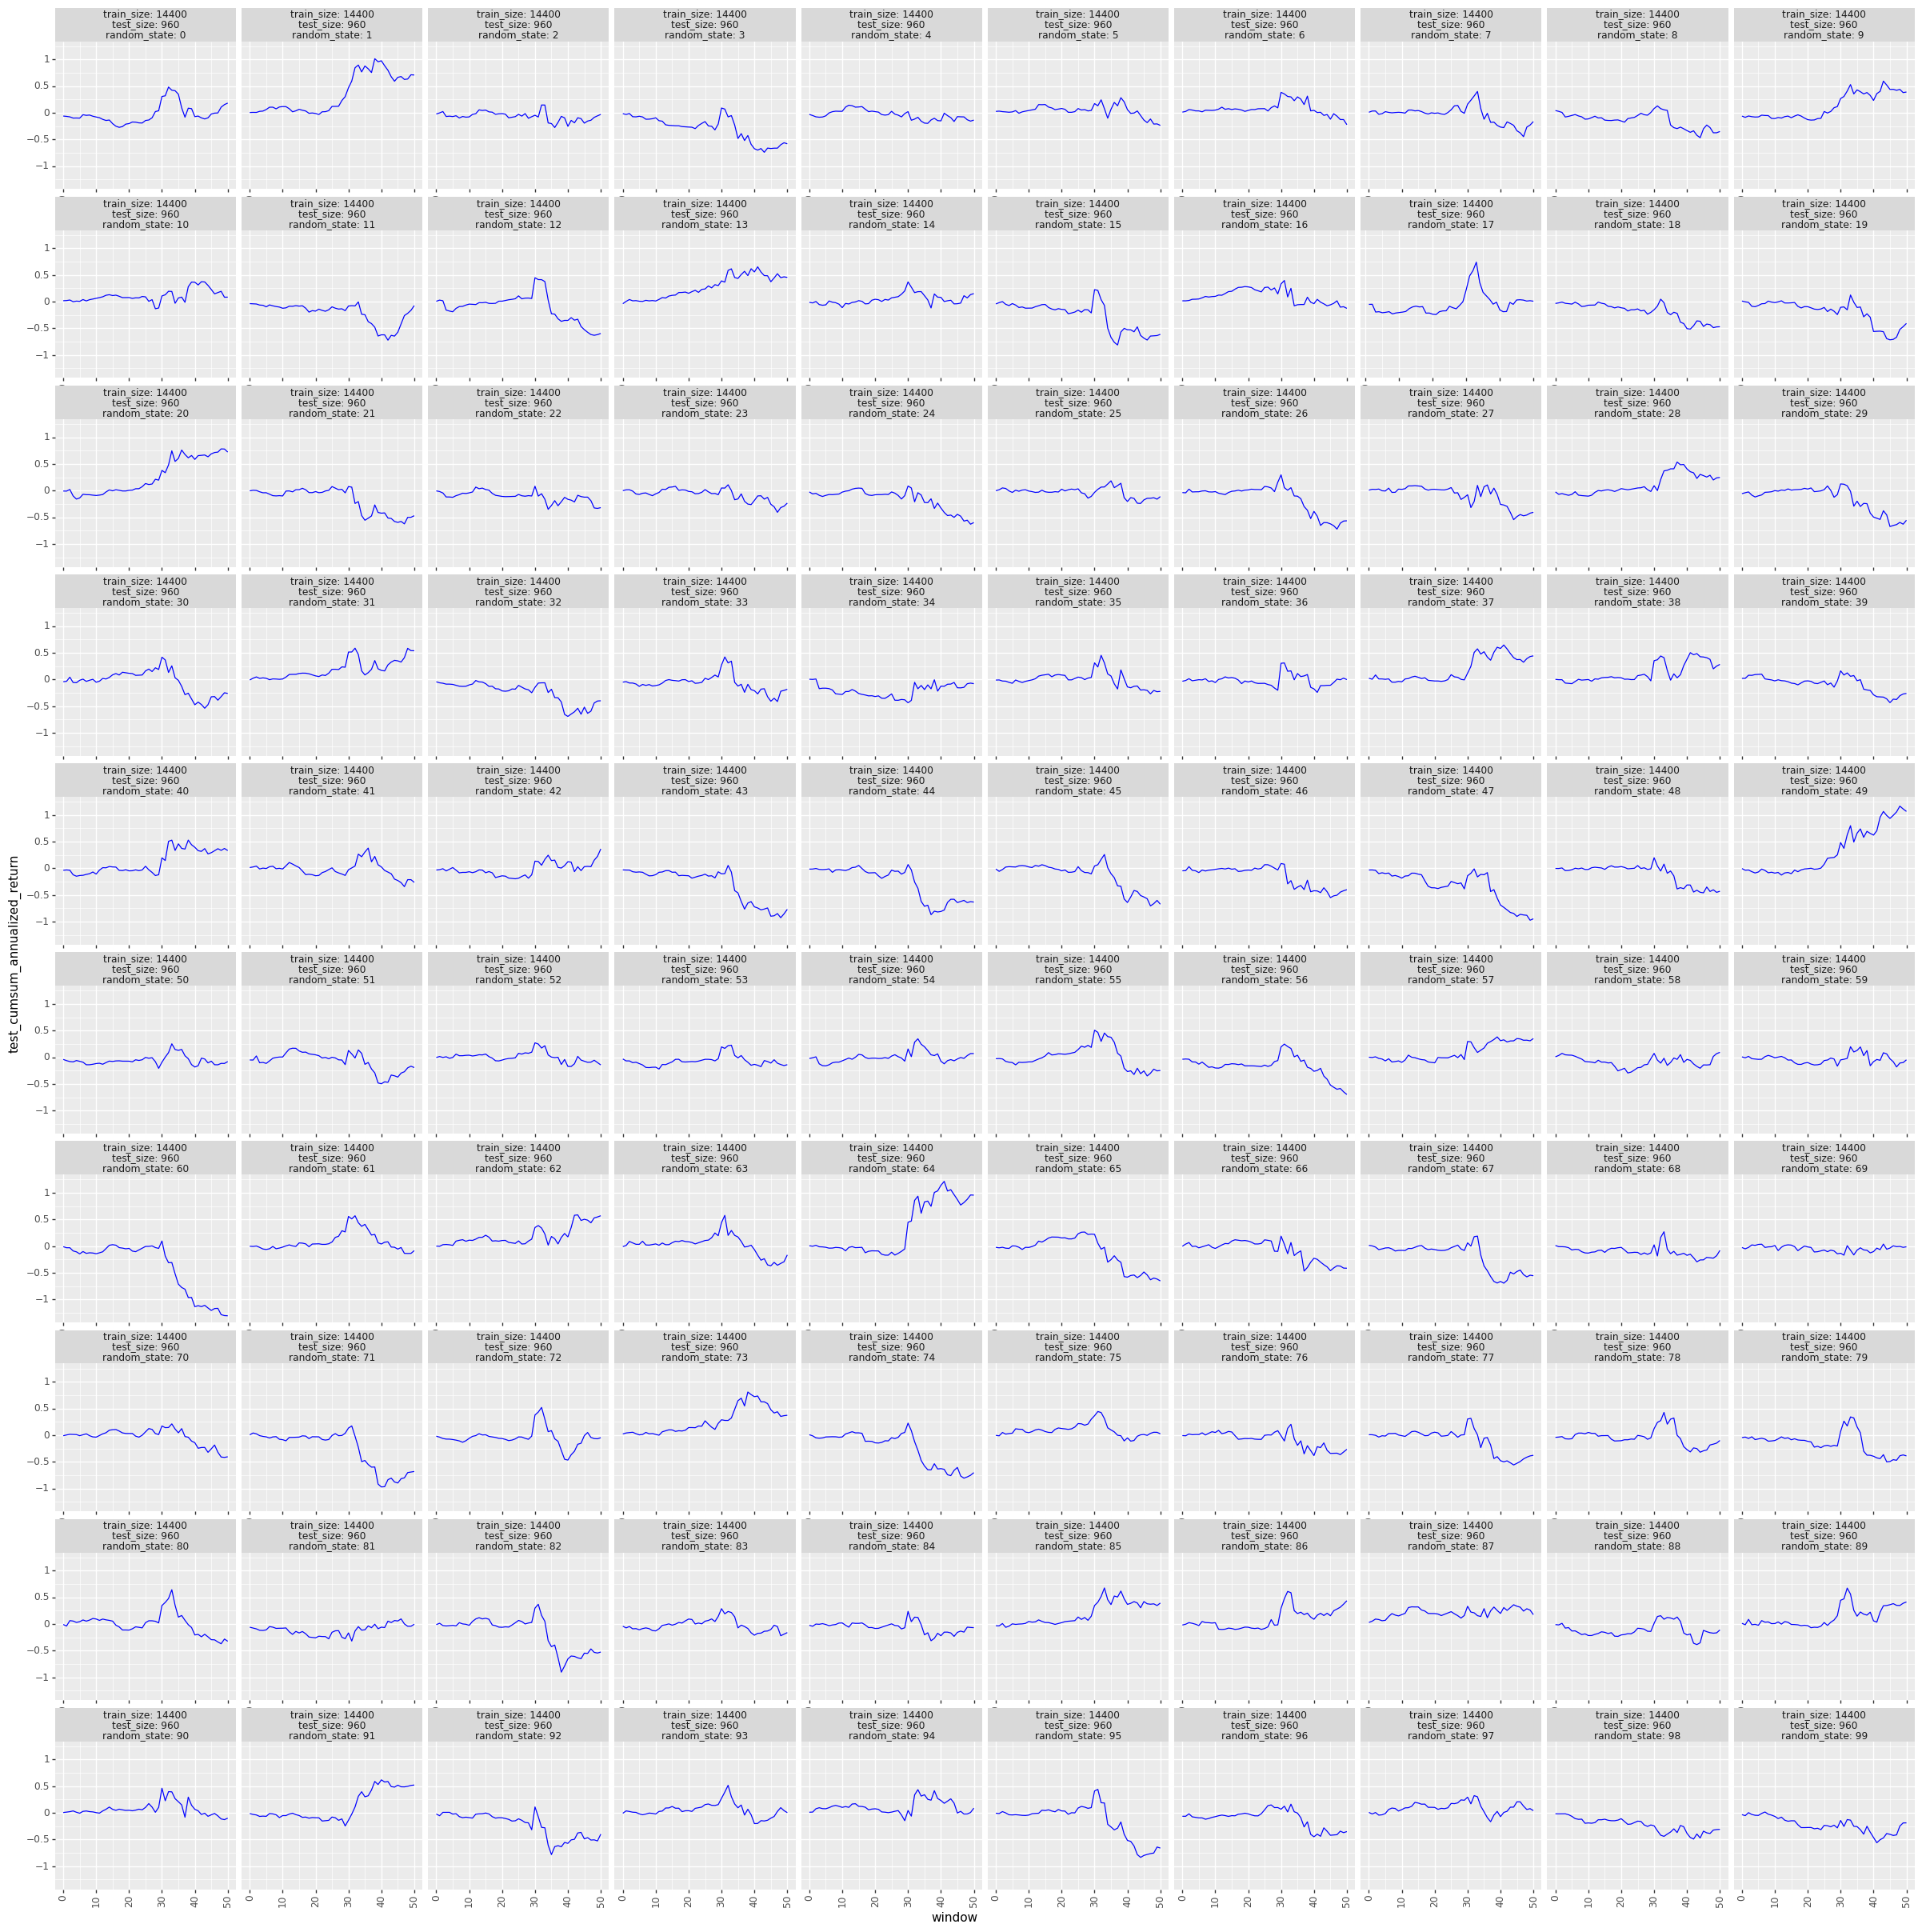

In [44]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)